In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_sub = pd.read_csv("gender_submission.csv")

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
sample_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
train = train.drop(["Name", "Ticket", "Cabin"], axis=1)
test = test.drop(["Name", "Ticket", "Cabin"], axis=1)


In [ ]:
sex = pd.get_dummies(train.Sex, drop_first=True)
embarked = pd.get_dummies(train.Embarked, drop_first=True)
train = pd.concat([train, sex, embarked], axis=1)
sex = pd.get_dummies(test.Sex, drop_first=True)
embarked = pd.get_dummies(test.Embarked, drop_first=True)
test = pd.concat([test, sex, embarked], axis=1)

In [ ]:
train = train.drop(["Sex", "Embarked"], axis=1)
test = test.drop(["Sex", "Embarked"], axis=1)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [ ]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,True,True,False
1,893,3,47.0,1,0,7.0000,False,False,True
2,894,2,62.0,0,0,9.6875,True,True,False
3,895,3,27.0,0,0,8.6625,True,False,True
4,896,3,22.0,1,1,12.2875,False,False,True


In [ ]:
train.mean()

,0
PassengerId,446.000000
Survived,0.383838
Pclass,2.308642
Age,29.699118
SibSp,0.523008
Parch,0.381594
Fare,32.204208
male,0.647587
Q,0.086420
S,0.722783


In [ ]:
train = train.fillna(train.mean())
test = test.fillna(test.mean())

In [ ]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.000000,1,0,7.2500,True,False,True
1,2,1,1,38.000000,1,0,71.2833,False,False,False
2,3,1,3,26.000000,0,0,7.9250,False,False,True
3,4,1,1,35.000000,1,0,53.1000,False,False,True
4,5,0,3,35.000000,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,True,False,True
887,888,1,1,19.000000,0,0,30.0000,False,False,True
888,889,0,3,29.699118,1,2,23.4500,False,False,True
889,890,1,1,26.000000,0,0,30.0000,True,False,False


In [ ]:
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.50000,0,0,7.8292,True,True,False
1,893,3,47.00000,1,0,7.0000,False,False,True
2,894,2,62.00000,0,0,9.6875,True,True,False
3,895,3,27.00000,0,0,8.6625,True,False,True
4,896,3,22.00000,1,1,12.2875,False,False,True
...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,True,False,True
414,1306,1,39.00000,0,0,108.9000,False,False,False
415,1307,3,38.50000,0,0,7.2500,True,False,True
416,1308,3,30.27259,0,0,8.0500,True,False,True


In [ ]:
features = train.iloc[:,2:].columns.tolist()
features

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']

In [ ]:
target = train.loc[:,'Survived']
target = target.name

In [ ]:
x_train = train.iloc[:, 2:].values.astype("float64")
x_train

array([[ 3.        , 22.        ,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.        , 38.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.        , 26.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 3.        , 29.69911765,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        , 26.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 3.        , 32.        ,  0.        , ...,  1.        ,
         1.        ,  0.        ]])

In [ ]:
y_train = train.loc[:, 'Survived'].values
y_train

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.autograd import Variable

In [ ]:
class NNet(nn.Module):
    def __init__(self):
        super(NNet, self).__init__()
        self.l1 = nn.Linear(8, 600)
        self.l2 = nn.Linear(600, 600)
        self.l3 = nn.Linear(600, 1)
        self.dropout = nn.Dropout(0.15)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = self.dropout(x)
        x = F.relu(self.l2(x))
        x = self.dropout(x)
        x = self.l3(x)
        return x

# mod = nn.Sequential(nn.Linear(8, 600), nn.Relu, nn.Linear(600, 600), nn.Linear(600, 1))
# mod = NNet()
# mod

NNet(
  (l1): Linear(in_features=8, out_features=600, bias=True)
  (l2): Linear(in_features=600, out_features=600, bias=True)
  (l3): Linear(in_features=600, out_features=1, bias=True)
  (dropout): Dropout(p=0.15, inplace=False)
)

In [ ]:
crit = nn.BCEWithLogitsLoss()

In [ ]:
optim = torch.optim.SGD(mod.parameters(), lr=0.02)

In [ ]:
batch_s = 33
epochs = 600
num_batch = len(x_train) // batch
num_batch

27

In [ ]:
train_loss_min = np.inf
for ep in range(epochs):
    train_loss = 0
    for batch_i in range(num_batch):
        st = batch_i * batch_s
        en = st + batch_s

        x_tensor = Variable(torch.FloatTensor(x_train[st:en]))
        y_tensor = Variable(torch.FloatTensor((y_train[st:en])))

        optim.zero_grad()
        out = mod(x_tensor).reshape(33)
        loss = crit(out, y_tensor)
        loss.backward()

        optim.step()
        train_loss += loss.item() * batch_s
    train_loss = train_loss / len(x_train)

    if train_loss < train_loss_min:
        print("Train loss decreased ({:6f} => {:6f})".format(train_loss_min,train_loss))
        torch.save(mod.state_dict(), "mod.pt")
        train_loss_min = train_loss
print("Trainig finished!")

In [ ]:
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.50000,0,0,7.8292,True,True,False
1,893,3,47.00000,1,0,7.0000,False,False,True
2,894,2,62.00000,0,0,9.6875,True,True,False
3,895,3,27.00000,0,0,8.6625,True,False,True
4,896,3,22.00000,1,1,12.2875,False,False,True
...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,True,False,True
414,1306,1,39.00000,0,0,108.9000,False,False,False
415,1307,3,38.50000,0,0,7.2500,True,False,True
416,1308,3,30.27259,0,0,8.0500,True,False,True


In [ ]:
sample_sub['PassengerId'].tolist()

[892,
 893,
 894,
 895,
 896,
 897,
 898,
 899,
 900,
 901,
 902,
 903,
 904,
 905,
 906,
 907,
 908,
 909,
 910,
 911,
 912,
 913,
 914,
 915,
 916,
 917,
 918,
 919,
 920,
 921,
 922,
 923,
 924,
 925,
 926,
 927,
 928,
 929,
 930,
 931,
 932,
 933,
 934,
 935,
 936,
 937,
 938,
 939,
 940,
 941,
 942,
 943,
 944,
 945,
 946,
 947,
 948,
 949,
 950,
 951,
 952,
 953,
 954,
 955,
 956,
 957,
 958,
 959,
 960,
 961,
 962,
 963,
 964,
 965,
 966,
 967,
 968,
 969,
 970,
 971,
 972,
 973,
 974,
 975,
 976,
 977,
 978,
 979,
 980,
 981,
 982,
 983,
 984,
 985,
 986,
 987,
 988,
 989,
 990,
 991,
 992,
 993,
 994,
 995,
 996,
 997,
 998,
 999,
 1000,
 1001,
 1002,
 1003,
 1004,
 1005,
 1006,
 1007,
 1008,
 1009,
 1010,
 1011,
 1012,
 1013,
 1014,
 1015,
 1016,
 1017,
 1018,
 1019,
 1020,
 1021,
 1022,
 1023,
 1024,
 1025,
 1026,
 1027,
 1028,
 1029,
 1030,
 1031,
 1032,
 1033,
 1034,
 1035,
 1036,
 1037,
 1038,
 1039,
 1040,
 1041,
 1042,
 1043,
 1044,
 1045,
 1046,
 1047,
 1048,
 1049,
 1

In [ ]:
x_test = test.iloc[:, 1:].values.astype("float64")
x_test_tens = torch.FloatTensor(x_test)
with torch.no_grad():
    res = torch.sigmoid(mod(x_test_tens).reshape(x_test_tens.shape[0]))

sub = pd.DataFrame({'PassengerId' : sample_sub['PassengerId'], "Survived" : res})
sub.Survived = sub.Survived.apply(lambda x: 0 if x < 0.5 else 1)
sub.to_csv('submission.csv', index=False)
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
sub.to_csv('submission.csv', index=False)
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Точность неплоха

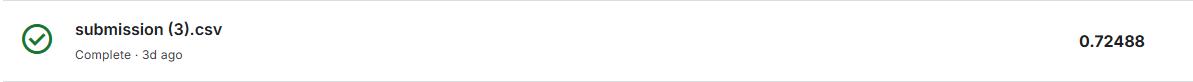